In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.dpi'] = 150

# Unprotected Libjbn


In [2]:
u_df = pd.read_csv('unprotected.csv')
u_df

,Function,Unprotected
0,fp_add,40
1,fp_expm_noct,66700
2,fp_fromM,100
3,fp_inv,115220
4,fp_mul,160
5,fp_sqr,160
6,fp_sub,40
7,fp_toM,160


# Protected Libjbn

In [3]:
p_df = pd.read_csv('protected.csv')
p_df

,Function,Protected
0,fp_add,60
1,fp_expm_noct,66680
2,fp_fromM,140
3,fp_inv,113400
4,fp_mul,180
5,fp_sqr,180
6,fp_sub,60
7,fp_toM,180


# Comparison

In [4]:
df = pd.merge(u_df, p_df, on='Function')
df

,Function,Unprotected,Protected
0,fp_add,40,60
1,fp_expm_noct,66700,66680
2,fp_fromM,100,140
3,fp_inv,115220,113400
4,fp_mul,160,180
5,fp_sqr,160,180
6,fp_sub,40,60
7,fp_toM,160,180


In [5]:
df_1 = df[df['Function'].isin(['fp_expm_noct', 'fp_inv'])]
df_1

# Estes resultados nao fazem sentido pq na versao protegida o while esta comentado

,Function,Unprotected,Protected
1,fp_expm_noct,66700,66680
3,fp_inv,115220,113400


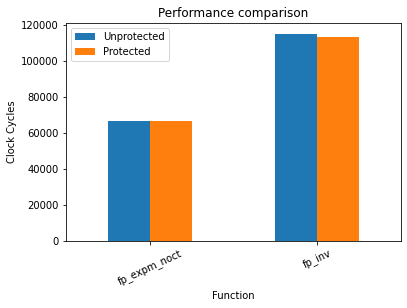

In [6]:
ax = df_1.plot(x="Function", y=["Unprotected", "Protected"], kind="bar", rot=25)
ax.set_title('Performance comparison')
ax.set_ylabel('Clock Cycles')
plt.show()

In [7]:
df_2 = df[df['Function'].isin(['fp_add', 'fp_fromM', 'fp_mul', 'fp_sqr', 'fp_sub', 'fp_toM'])]
df_2

,Function,Unprotected,Protected
0,fp_add,40,60
2,fp_fromM,100,140
4,fp_mul,160,180
5,fp_sqr,160,180
6,fp_sub,40,60
7,fp_toM,160,180


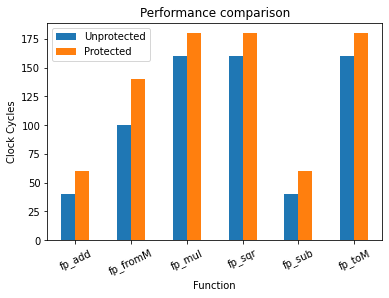

In [8]:
ax = df_2.plot(x="Function", y=["Unprotected", "Protected"], kind="bar", rot=25)
ax.set_title('Performance comparison')
ax.set_ylabel('Clock Cycles')
plt.show()

In [9]:
df['Overhead (%)'] = ((df['Protected'] - df['Unprotected']) / df['Unprotected']) * 100
df['Overhead (%)'] = df['Overhead (%)'].round(2)
df

,Function,Unprotected,Protected,Overhead (%)
0,fp_add,40,60,50.00
1,fp_expm_noct,66700,66680,-0.03
2,fp_fromM,100,140,40.00
3,fp_inv,115220,113400,-1.58
4,fp_mul,160,180,12.50
5,fp_sqr,160,180,12.50
6,fp_sub,40,60,50.00
7,fp_toM,160,180,12.50


In [10]:
df.to_csv('fp_comparison.csv', index=False)